In [1]:
import pandas as pd
import jieba 
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager

In [2]:
## 读入高端手机的数据
data = pd.read_csv('./high.csv',encoding='utf-8')
## 读入中端手机的数据
## data = pd.read_csv('./mid.csv',encoding='utf-8')
##读入低端手机的数据
##data = pd.read_csv('./low.csv',encoding='utf-8')

In [3]:
## 查看数据
data.head()

,机型,IMEI,日期,类别,描述
0,X Flip,f4d3c8815c34764f6a39ddf816106424,2023-04-28,续航赛道_x0000_,需要我过去做什么么？或者我转账给你你闪送来;卡针有没有;带个卡针;尾款多少;中国联通大厦北门...
1,X Flip,6ef41eaacea279abdb33606f13ef5d3f,2023-04-28,内置程序_x0000_,左边这个吧;现在都可;711便利店门口等哈;好;在哪？;发照片给我看看;这里只有左拐;这里只...
2,X Flip,23d3f4919208d9414173c58c0869f47b,2023-04-28,内置程序_x0000_,主题不错_x0000_
3,X Flip,839735255dfbf22029d39a83712e5623,2023-04-28,内置程序_x0000_,imei码：*** 1、问题现象及复现步骤：X Flip外屏上面没有小红书，很多软件都没有，...
4,X Flip,dd6330b527a900c07a3186214c6c4478,2023-04-28,性能赛道_x0000_,这样么;哈哈哈还有一个视频没过去呢;咱俩还视频嘛;网卡;好;然后嘞;这样么;这样;么;需要插...


In [4]:
## 数据大小
data.shape

(73160, 5)

In [5]:
## 删除无用列
data.drop(columns = ["IMEI","日期"], inplace = True)

In [6]:
data.head(10)

,机型,类别,描述
0,X Flip,续航赛道_x0000_,需要我过去做什么么？或者我转账给你你闪送来;卡针有没有;带个卡针;尾款多少;中国联通大厦北门...
1,X Flip,内置程序_x0000_,左边这个吧;现在都可;711便利店门口等哈;好;在哪？;发照片给我看看;这里只有左拐;这里只...
2,X Flip,内置程序_x0000_,主题不错_x0000_
3,X Flip,内置程序_x0000_,imei码：*** 1、问题现象及复现步骤：X Flip外屏上面没有小红书，很多软件都没有，...
4,X Flip,性能赛道_x0000_,这样么;哈哈哈还有一个视频没过去呢;咱俩还视频嘛;网卡;好;然后嘞;这样么;这样;么;需要插...
5,X Flip,内置程序_x0000_,我是九十岁带氧写文(微信要交手续费);[微笑][微笑];你好;我咋看不到;他发的消息;都是白...
6,X Flip,内置程序_x0000_,一会来;店里相机自拍是不是调过设置啊_x0000_
7,X Flip,内置程序_x0000_,您把负责办理手机卡那姐姐电话发我吧;发短信应该不行，他让我自己手写一个申请书_x0000_
8,X Flip,内置程序_x0000_,;通讯录和照片怎么导啊;[OK];行我自己研究下，我飞机落地太晚了，如果整不明白，明天白天联...
9,X Flip,内置程序_x0000_,用户来电表示手机外面小屏微信是横屏，魔镜添加的软件在外屏都显示的是竖屏，怎么设置为横屏。跟咨...


In [7]:
## 查看数据类型，能否转换
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73160 entries, 0 to 73159
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   机型      73160 non-null  object
 1   类别      73160 non-null  object
 2   描述      73118 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [8]:
## 查看这种机型的类别赛道
data["类别"].unique()

array(['续航赛道_x0000_', '内置程序_x0000_', '性能赛道_x0000_', '发热赛道_x0000_', '内置程序',
       '性能赛道', '发热赛道', '续航赛道', '生物识别1_x0000_', '外观体验_x0000_', '屏裂_x0000_',
       '触控_x0000_', '通话_x0000_', '无线网络_x0000_', '音频_x0000_', '升级_x0000_',
       '外观设计_x0000_', '外观材料可靠性_x0000_', '外观结构可靠性_x0000_', '外观体验', '外观设计',
       '触控', '音频', '升级', '通话', '配件赠送_x0000_', '充电与电池_x0000_', 'SIM卡与TF卡',
       '无线网络', '生物识别1', '配件赠送', '外观材料可靠性', '内存存储', 'SIM卡与TF卡_x0000_',
       '按键_x0000_', '屏幕_x0000_', '内存存储_x0000_', '移动网络赛道_x0000_',
       'USB线_x0000_', '硬件配置_x0000_', '显示_x0000_', '传感器_x0000_',
       '系统流畅性_x0000_', '电池盖裂_x0000_', '屏幕', '系统流畅性', '屏裂', '充电与电池', '保护膜',
       '移动网络赛道', '显示', '保护膜_x0000_', '物理安全_x0000_', 'USB连接_x0000_',
       '第三方程序_x0000_', '系统整体感受_x0000_', '摄像头_x0000_', '第三方广告_x0000_',
       '拍照_x0000_', '第三方程序', '物理安全', '拍照', '系统稳定性', '振动_x0000_',
       '多设备互联_x0000_', '系统稳定性_x0000_', '电池盖裂', '保护套_x0000_',
       '整体评价_x0000_', '防水防尘_x0000_', '传感器', '整体评价', '闪光灯/手电筒', '第三方广告',
       '外观结构可靠性', 

In [9]:
## 数据筛选 分别筛选出一个手机有关内置程序 性能赛道 发热赛道的数据
data_value_type1 = data.loc[(data['类别'].str.contains('内置程序')), :]
data_value_type1.head(20)
#data_value_type1.info()

,机型,类别,描述
1,X Flip,内置程序_x0000_,左边这个吧;现在都可;711便利店门口等哈;好;在哪？;发照片给我看看;这里只有左拐;这里只...
2,X Flip,内置程序_x0000_,主题不错_x0000_
3,X Flip,内置程序_x0000_,imei码：*** 1、问题现象及复现步骤：X Flip外屏上面没有小红书，很多软件都没有，...
5,X Flip,内置程序_x0000_,我是九十岁带氧写文(微信要交手续费);[微笑][微笑];你好;我咋看不到;他发的消息;都是白...
6,X Flip,内置程序_x0000_,一会来;店里相机自拍是不是调过设置啊_x0000_
7,X Flip,内置程序_x0000_,您把负责办理手机卡那姐姐电话发我吧;发短信应该不行，他让我自己手写一个申请书_x0000_
8,X Flip,内置程序_x0000_,;通讯录和照片怎么导啊;[OK];行我自己研究下，我飞机落地太晚了，如果整不明白，明天白天联...
9,X Flip,内置程序_x0000_,用户来电表示手机外面小屏微信是横屏，魔镜添加的软件在外屏都显示的是竖屏，怎么设置为横屏。跟咨...
10,X Flip,内置程序_x0000_,喜欢壁纸_x0000_
12,X Flip,内置程序_x0000_,我等我老公大概11点几;支付宝可否用我手机登录;可以的，我就一阵过去;我想问一下镜头有无屏保...


In [10]:
data_value_type2 = data.loc[(data['类别'].str.contains('续航赛道')), :]
data_value_type2.head(20)
#data_value_type2.info()

,机型,类别,描述
0,X Flip,续航赛道_x0000_,需要我过去做什么么？或者我转账给你你闪送来;卡针有没有;带个卡针;尾款多少;中国联通大厦北门...
16,X Flip,续航赛道_x0000_,这版本续航有待优化哦 刚充满手机打开打了两个字电量就到99了 ?_x0000_
35,X Flip,续航赛道_x0000_,@阴天快乐 兄弟别看了不管里面有没有男的反正买手机也没几个人[捂脸];这个中啥了啊[让我看看...
42,X Flip,续航赛道_x0000_,你说的对。大电池才是王道_x0000_
44,X Flip,续航赛道_x0000_,机子非常貌美，上手体验我承认高估了他，微信小游戏居然还不能完全匹配，宣传的小红书匹配但是不能...
47,X Flip,续航赛道_x0000_,一天大约充两次电_x0000_
50,X Flip,续航赛道_x0000_,vivo XFlip还配备有大容量的电池，续航时间很长，我一天使用下来，还有大约20%的电量...
56,X Flip,续航赛道_x0000_,续航咋样_x0000_
60,X Flip,续航赛道_x0000_,店长，充电的时候，手机折叠后的金属处有点漏电的感觉[尴尬];不会;也不严重吧，就是手指摸上去...
62,X Flip,续航赛道_x0000_,您好;我手机充一宿电怎么百分之99电呀;所以他就不100了？;好;这个对充电有影响;我从昨天...


In [11]:
data_value_type3 = data.loc[(data['类别'].str.contains('性能赛道')), :]
data_value_type3.head(20)
#data_value_type3.info()

,机型,类别,描述
4,X Flip,性能赛道_x0000_,这样么;哈哈哈还有一个视频没过去呢;咱俩还视频嘛;网卡;好;然后嘞;这样么;这样;么;需要插...
11,X Flip,性能赛道_x0000_,我就想要我定的那款;今天没有办法给我的话，200退我吧;好的;没事;好的;看来很抢手啊;我就...
26,X Flip,性能赛道_x0000_,我是XFilp推荐官，首先vivo XFlip屏幕采用了6.74英寸内屏和3.0英寸的外屏组...
32,X Flip,性能赛道_x0000_,x flip 王者主流游戏什么时候支持高帧率_x0000_
33,X Flip,性能赛道_x0000_,亲爱的vivo家人们下午好 今日的福利时间到啦;今日福利 5A数据线一根;[强]vivo X...
34,X Flip,性能赛道_x0000_,为什么不用最新处理器，为什么不是屏幕指纹_x0000_
37,X Flip,性能赛道_x0000_,我最喜欢的vivo X Flip 铰链先进，持久耐用在铰链工艺方面，vivo X Filp选...
48,X Flip,性能赛道_x0000_,X flip录制视频在4k和1080p模式下选择60帧拍摄还是一直处于30帧的状态，用720...
59,X Flip,性能赛道_x0000_,我是XFlip推荐官 好产品用成绩说话！全能大折叠vivo X Fold2 和最美小折叠vi...
64,X Flip,性能赛道_x0000_,X Flip感觉虽然性能上比起以前的翻盖是天差地别了，但这宣传图感觉多少有点反智。。。[fa...


In [12]:
## 可以对于整体机型，提取描述内容，或者更改变量选取分割好的同一个机型的不同赛道进行分析
content = data.描述.values.astype(str).tolist()
## content = data_value_type1.描述.values.astype(str).tolist()
## content = data_value_type2.描述.values.astype(str).tolist()
## content = data_value_type3.描述.values.astype(str).tolist()

In [13]:
## 调用jieba进行分词
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n':
        content_S.append(current_segment)
content_S[3]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dell\AppData\Local\Temp\jieba.cache
Loading model cost 0.688 seconds.
Prefix dict has been built successfully.


['x',
 ' ',
 'flip',
 ' ',
 '王者',
 '主流',
 '游戏',
 '什么',
 '时候',
 '支持',
 '高帧',
 '率',
 '_',
 'x0000',
 '_']

In [14]:
## 查看当前分词后的结果
df_content = pd.DataFrame({'content_S':content_S})
df_content.head(10)

,content_S
0,"[这样, 么, ;, 哈哈哈, 还有, 一个, 视频, 没, 过去, 呢, ;, 咱俩, 还..."
1,"[我, 就, 想要, 我定, 的, 那款, ;, 今天, 没有, 办法, 给, 我, 的话,..."
2,"[我, 是, XFilp, 推荐, 官, ，, 首先, vivo, , XFlip, 屏幕..."
3,"[x, , flip, , 王者, 主流, 游戏, 什么, 时候, 支持, 高帧, 率,..."
4,"[亲爱, 的, vivo, 家, 人们, 下午, 好, , 今日, 的, 福利, 时间, ..."
5,"[为什么, 不用, 最新, 处理器, ，, 为什么, 不是, 屏幕, 指纹, _, x000..."
6,"[我, 最, 喜欢, 的, vivo, , X, , Flip, , 铰链, 先进, ..."
7,"[X, , flip, 录制, 视频, 在, 4k, 和, 1080p, 模式, 下, 选..."
8,"[我, 是, XFlip, 推荐, 官, , 好, 产品, 用, 成绩, 说话, ！, 全..."
9,"[X, , Flip, 感觉, 虽然, 性能, 上, 比起, 以前, 的, 翻盖, 是, ..."


In [15]:
## 去掉停用词，进行数据的清洗
stopwords = pd.read_csv('stopwords.txt',index_col = False,sep = "\t",quoting = 3,names = ['stopword'],encoding = 'utf-8')
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words

contents = df_content.content_S.values.tolist()
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

In [16]:
## 查看清洗后的结果
df_content = pd.DataFrame({'contents_clean':contents_clean})
df_content.head(10)

,contents_clean
0,"[哈哈哈, 视频, 没, 过去, 咱俩, 还, 视频, 网卡, 嘞, 需要, 插卡, oko..."
1,"[想要, 我定, 那款, 今天, 办法, 200, 退, 没事, 看来, 很, 抢手, 比较..."
2,"[XFilp, 推荐, 官, , XFlip, 屏幕, 采用, 6.74, 英寸, 内屏,..."
3,"[x, , flip, , 王者, 主流, 游戏, 支持, 高帧, 率, x0000]"
4,"[亲爱, 家, 人们, 下午, , 今日, 福利, 时间, 今日, 福利, , 5A, ..."
5,"[不用, 最新, 处理器, 不是, 屏幕, 指纹, x0000]"
6,"[最, 喜欢, , X, , Flip, , 铰链, 先进, 持久, 耐用, 铰链, ..."
7,"[X, , flip, 录制, 视频, 4k, 1080p, 模式, 下, 选择, 60,..."
8,"[XFlip, 推荐, 官, , 产品, 成绩, 说话, 全能, 大, 折叠, , X,..."
9,"[X, , Flip, 感觉, 性能, 上, 比起, 以前, 翻盖, 天差地别, 宣传, ..."


In [17]:
## 找到出现的所有的词
df_all_words = pd.DataFrame({'all_words':all_words})
df_all_words.head(10)

,all_words
0,哈哈哈
1,视频
2,没
3,过去
4,咱俩
5,还
6,视频
7,网卡
8,嘞
9,需要


In [18]:
## 统计词频
words_count = df_all_words.groupby(by = ['all_words']) ['all_words'].agg({"count",np.size})
words_count = words_count.reset_index().sort_values(by = ["count"],ascending = False)
words_count.head(10)

,all_words,size,count
1,,23032,23032
15131,帧,2346,2346
10788,卡顿,2306,2306
9568,出现,2247,2247
21562,游戏,2226,2226
24393,系统,2167,2167
10682,卡,2049,2049
8110,使用,2004,2004
27715,还,1959,1959
15939,很,1875,1875


In [20]:
##选取频率最高的一些有效高频词
lines = words_count.head(20)
lines = lines.drop(1)
lines

,all_words,size,count
15131,帧,2346,2346
10788,卡顿,2306,2306
9568,出现,2247,2247
21562,游戏,2226,2226
24393,系统,2167,2167
10682,卡,2049,2049
8110,使用,2004,2004
27715,还,1959,1959
15939,很,1875,1875
20882,没,1798,1798


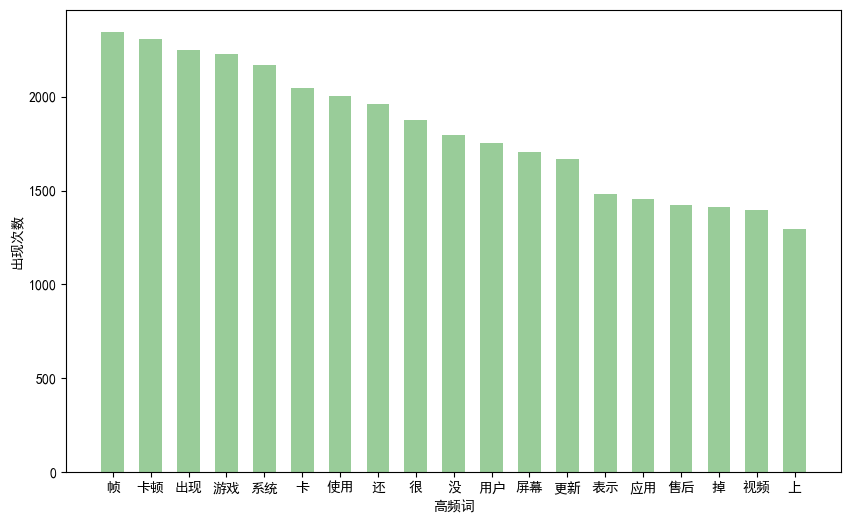

In [21]:
## 绘制柱状图
plt.figure(figsize = (10,6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.bar(
    x = lines['all_words']
    ,height = lines['count']
    ,width = 0.6
    ,color = 'green'
    ,alpha = 0.4
)
plt.xlabel('高频词')
plt.ylabel('出现次数')
plt.show()

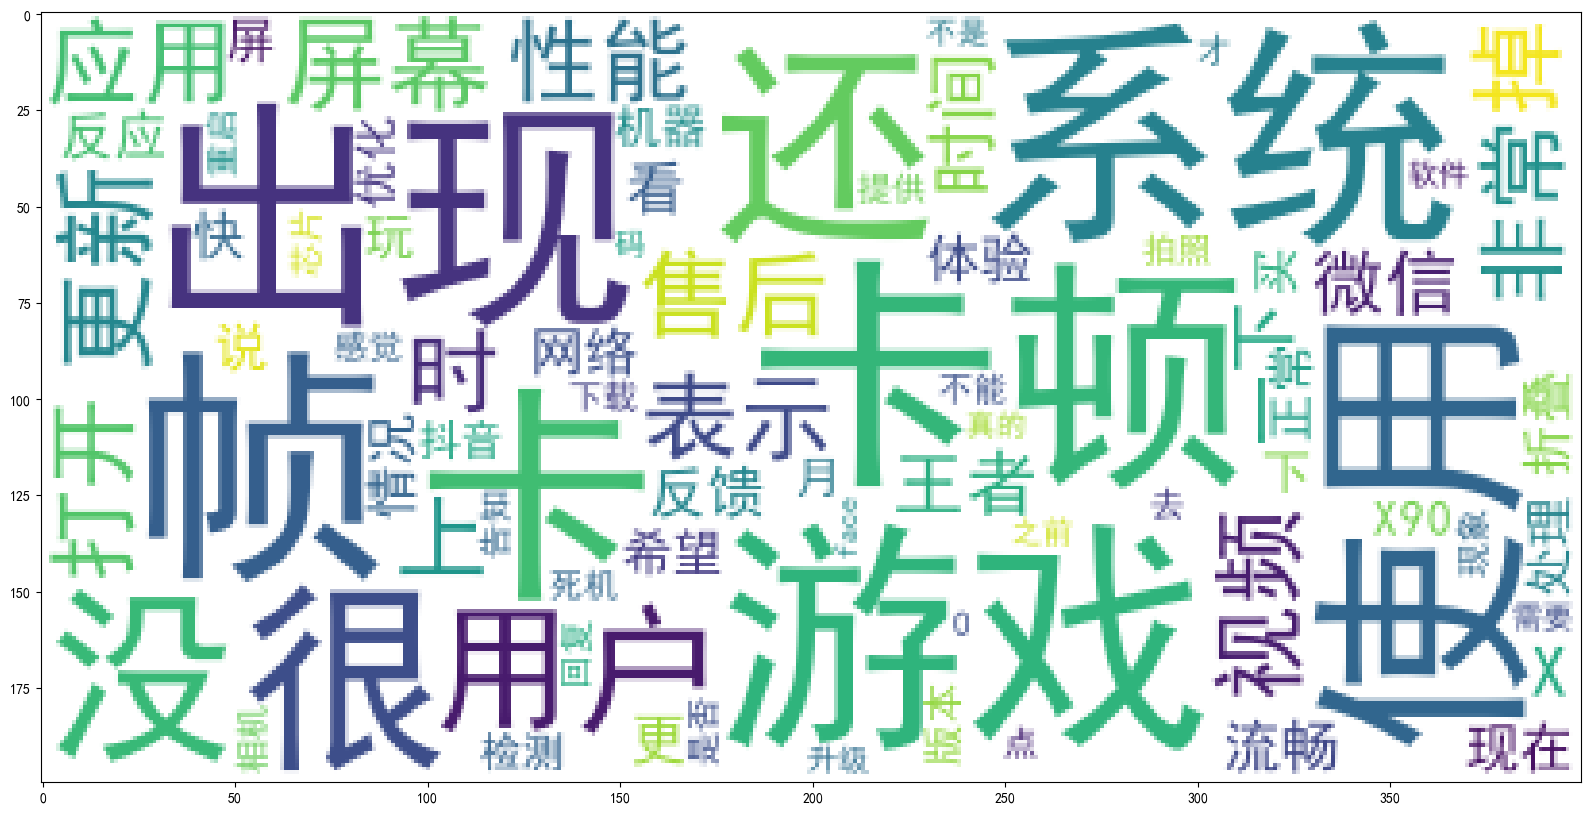

In [22]:
## 生成词云
plt.rcParams['figure.figsize'] = (20.0,10.0)

wordcloud = WordCloud(font_path = "./data/simhei.ttf",background_color = "white",max_font_size = 120)
word_frequence = {x[0]:x[1] for x in words_count.head(80).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)